In [1]:
!pip install python-multipart
!pip install pyngrok
!pip install nest-asyncio
!pip install uvicorn
!pip install fastapi


!git clone https://github.com/PhDSGilber/Segmentation_medical_images.git
!pip install git+https://github.com/facebookresearch/segment-anything.git
%cd /content/Segmentation_medical_images
!wget "https://dl.dropboxusercontent.com/scl/fi/9r90jmxqqu1jbsyxy6fr3/sam_vit_b_01ec64.pth?rlkey=to1ppb9n9l49gjyuqwywif6x9&dl=1"
!wget "https://dl.dropboxusercontent.com/scl/fi/d8s4qd7fomld6nij9x0om/vit_DSB.pth?rlkey=y3hkw112mbd4yw2cmpyrk3fc1&dl=1"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 1.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.2/732.2 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-7.0.2-py3-none-any.whl size=21233 sha256=c1198e8c79aee8b905c82aff8beb34180a75cff6c4f7af7947aa9b112227728e
  Stored in directory: /root/.cache/pip/wheels/63/3f/ca/3ee63fa3bf9dfcf6014bb5ea56026c8b218ad26b422fd9cce1
Successfully built pyngrok
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.5 MB/s eta 0:00:00
ERROR: pip's d

# SAM PATH MODEL

In [2]:
!mv 'sam_vit_b_01ec64.pth?rlkey=to1ppb9n9l49gjyuqwywif6x9&dl=1' 'sam_vit_b_01ec64.pth'

In [3]:
from MODELS.SAM.SAM_WEIGTHS_OTHERS_TRAINING import sam_path

In [ ]:
def inference_SAM(img):
  f = sam_path.sam_inference(im_sam,mask_generator)


In [11]:
!wget "https://dl.dropboxusercontent.com/scl/fi/d8s4qd7fomld6nij9x0om/vit_DSB.pth?rlkey=y3hkw112mbd4yw2cmpyrk3fc1&dl=1"
!mv 'vit_DSB.pth?rlkey=y3hkw112mbd4yw2cmpyrk3fc1&dl=1' 'vit_DSB.pth'

--2023-12-02 16:30:29--  https://dl.dropboxusercontent.com/scl/fi/d8s4qd7fomld6nij9x0om/vit_DSB.pth?rlkey=y3hkw112mbd4yw2cmpyrk3fc1&dl=1
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.81.15, 2620:100:6031:15::a27d:510f
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.81.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 375062910 (358M) [application/octet-stream]
Saving to: ‘vit_DSB.pth?rlkey=y3hkw112mbd4yw2cmpyrk3fc1&dl=1’

vit_DSB.pth?rlkey=y 100%[===================>] 357.69M  11.5MB/s    in 33s     

2023-12-02 16:31:04 (10.7 MB/s) - ‘vit_DSB.pth?rlkey=y3hkw112mbd4yw2cmpyrk3fc1&dl=1’ saved [375062910/375062910]



In [12]:
mask_generator = sam_path.sam_segmentation('./vit_DSB.pth')

RuntimeError: ignored

In [5]:
import matplotlib.pyplot as plt

In [7]:
import cv2

In [17]:
import numpy as np

In [19]:
np.min(im_sam)

0

In [35]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [36]:
import numpy as np

In [ ]:
mask_generator.generate()

In [ ]:
f*255

In [ ]:
f

In [ ]:
sorted_result = sorted(masks, key=(lambda x: x['area']),      reverse=True)
# Plot for each segment area
for val in sorted_result:
  mask = val['segmentation']
  img = np.ones((mask.shape[0], mask.shape[1], 3))
  color_mask = np.random.random((1, 3)).tolist()[0]
  for i in range(3):
    img[:,:,i] = color_mask[i]
    plt.imshow(np.dstack((img, mask*0.5)))
    plt.imshow


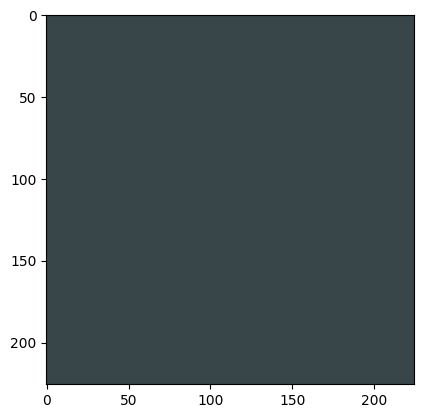

In [46]:
plt.imshow(img)

In [45]:
im_sam = cv2.imread('./imagen_train.jpg')
masks = mask_generator.generate(im_sam)

sorted_result = sorted(masks, key=(lambda x: x['area']),      reverse=True)
# Plot for each segment area
for val in sorted_result:
  mask = val['segmentation']
  img = np.ones((mask.shape[0], mask.shape[1], 3))
  color_mask = np.random.random((1, 3)).tolist()[0]
  for i in range(3):
    img[:,:,i] = color_mask[i]


# UNET MODEL

In [2]:
import tensorflow as tf

In [3]:
def DICE_metric(y_true, y_pred):

  y_true = tf.cast(y_true , dtype=tf.double)

  y_pred = tf.cast(y_pred  , dtype=tf.double)

  intersection = tf.reduce_sum(y_true * y_pred)
  union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
  dice = (2.0 * intersection + 1e-5) / (union + 1e-5)

  return dice

In [4]:
model_unet = tf.keras.models.load_model('./MODELS/TRAIN/UNET/checkpoints', custom_objects={'DICE_metric': DICE_metric})

In [30]:
def inference_unet(img):
  img_resized = cv2.resize(img, (128, 128))
  img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
  img_gray = np.expand_dims(img_gray, axis=0)
  y_pred_unet = model_unet.predict(img_gray)
  y_pred_unet = y_pred_unet[0,:,:,0]
  y_pred_unet = np.repeat(y_pred_unet[..., np.newaxis], 3, axis=-1)
  y_pred_unet = y_pred_unet*255
  y_pred_unet = y_pred_unet.astype(np.uint8)
  return y_pred_unet


# mf2

In [44]:
model_mf2 = tf.keras.models.load_model('./MODELS/TRAIN/MF2/checkpoints', custom_objects={'DICE_metric': DICE_metric})

In [45]:
def inference_MF2(img):
  img_resized = cv2.resize(img, (128, 128))
  img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
  img_gray = np.expand_dims(img_gray, axis=0)
  y_pred_mf2 = model_mf2.predict(img_gray)
  y_pred_mf2 = y_pred_mf2[0,:,:,0]
  y_pred_mf2 = np.repeat(y_pred_mf2[..., np.newaxis], 3, axis=-1)
  y_pred_mf2 = y_pred_mf2*255
  y_pred_mf2 = y_pred_mf2.astype(np.uint8)
  return y_pred_mf2

In [ ]:
https://drive.google.com/drive/folders/1_AMtUL_okP81k8L_WPHJnQQEN_gKttaq?usp=drive_link

# SAM_UNETR

In [ ]:
https://drive.google.com/file/d/1-U2P3YEXO4GKDJQyuuLKdn9nDb0CbxQO/view?usp=sharing

In [46]:
!wget 'https://drive.google.com/uc?export=download&id=1-U2P3YEXO4GKDJQyuuLKdn9nDb0CbxQO' -O SAMUnetrV2_128x128_pretrained_D_S_B_128_200_last_weigths.pth


--2023-12-02 18:37:58--  https://drive.google.com/uc?export=download&id=1-U2P3YEXO4GKDJQyuuLKdn9nDb0CbxQO
Resolving drive.google.com (drive.google.com)... 172.217.194.101, 172.217.194.139, 172.217.194.138, ...
Connecting to drive.google.com (drive.google.com)|172.217.194.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘SAMUnetrV2_128x128_pretrained_D_S_B_128_200_last_weigths.pth’

SAMUnetrV2_128x128_     [ <=>                ]   2.27K  --.-KB/s    in 0s      

2023-12-02 18:37:58 (36.4 MB/s) - ‘SAMUnetrV2_128x128_pretrained_D_S_B_128_200_last_weigths.pth’ saved [2323]



# SERVER

In [6]:
import base64
import numpy as np
from fastapi import FastAPI
from pydantic import BaseModel
from fastapi import FastAPI, File, UploadFile
from fastapi.middleware.cors import CORSMiddleware
from PIL import Image
import io
import uvicorn
import os
from pyngrok import ngrok
import nest_asyncio
import cv2
from pydantic import BaseModel
import matplotlib.pyplot as plt

In [19]:
def image_to_base64(img):

  image = Image.fromarray(img)
  buffer = io.BytesIO()
  image.save(buffer, format="JPEG")
  buffer.seek(0)
  img_bytes = buffer.getvalue()
  img_base64 = base64.b64encode(img_bytes)
  img_base64_str = img_base64.decode('utf-8')

  return img_base64_str

In [35]:
class inputimg(BaseModel):
    img: str
    format: str

app = FastAPI()

# Permitir solicitudes desde cualquier origen (para evitar problemas CORS con Streamlit)
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

@app.post("/predict/")
async def predict_1(inp: inputimg):
  # Aquí va la lógica para procesar la imagen y obtener la máscara
  img_base64 = inp.img
  print(img_base64)
  # Decodificar la cadena base6
  img_bytes = base64.b64decode(img_base64)

  img_array = cv2.imdecode(np.frombuffer(img_bytes, np.uint8), cv2.IMREAD_COLOR)




  # # Realizar la inferencia con tu modelo aquí
  # mask1, mask2, mask3, mask4 = predic()#tu_modelo.predict(image)
  mask1 = inference_unet(img_array)
  mask2 = inference_MF2(img_array)

  mask1_base64 = image_to_base64(mask1)
  mask2_base64 = image_to_base64(mask2)
  mask3_base64 = image_to_base64(mask1)
  mask4_base64 = image_to_base64(mask1)


  # # Convertir la máscara en un formato adecuado para enviar de vuelta
  # # Por ejemplo, convertirla en bytes

  return {"mask1": mask1_base64,
          "mask2": mask2_base64,
          "mask3": mask3_base64,
          "mask4": mask4_base64}


if __name__ == "__main__":
    ngrok.kill()
    auth_token = "2YxgAoLPgpGapNB2hqUQJ9v9LdO_7Kq2zswPZ3agBZJowyfzv"
    os.system(f"ngrok authtoken {auth_token}")
    ngrok.set_auth_token(auth_token)

    ngrok_tunnel = ngrok.connect(8000)  # Eliminar await aquí
    print('Public URL:', ngrok_tunnel.public_url)

    nest_asyncio.apply()
    uvicorn.run(app, host="0.0.0.0", port=8000)


Public URL: https://75c3-34-143-149-107.ngrok-free.app


INFO:     Started server process [936]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCADiAOEDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDwLAowKWigBMCjApwBpxQ46UAMAHpXQ+EorSXWI0ureKVD/DIgYfrXPkYqzY3LWl0kyHlTmgD3eLw/oIA/4kunNkZObVP8K4nx/Do1rCkVnp1nBIepigVT29BS2/xAEduCQfM24/zzXD6vqkmpXTzOc5oAzGAz0puBS0UAJgUm

INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [936]


In [ ]:
ngrok.kill()
auth_token = "2YxgAoLPgpGapNB2hqUQJ9v9LdO_7Kq2zswPZ3agBZJowyfzv"
os.system(f"ngrok authtoken {auth_token}")
ngrok.set_auth_token(auth_token)

ngrok_tunnel = await ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)

ValueError: ignored